# Extracting and Visualizing Tesla and GameStop Stocks data 

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    
</div>

<hr>


In [ ]:
!pip install yfinance==0.1.67
!pip install pandas==1.3.3
!pip install requests==2.26.0
#!mamba install bs4==4.10.0 -y
!pip install plotly==5.3.1

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Using yfinance to Extract Stock Data


Using the `Ticker` function to enter the ticker symbol of the stock we want to extract data on.


In [3]:
TickerSymbol = 'TSLA'

Using the ticker object and the function `history` we extract stock information and save it in a dataframe named `tesla_data`. we set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tickerData = yf.Ticker(TickerSymbol)

tesla_data = tickerData.history(period='max')


tesla_data.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame.


In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Using Webscraping to Extract Tesla Revenue Data


In [7]:
##Here i used beautiful soup, for game stop i'll use read_html function (pandas)

In [8]:
response = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue')
html_data = response.content

Parse the html data using `beautiful_soup`.


In [9]:
soup = BeautifulSoup(html_data, 'html5lib')

In [10]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
   
    
    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)  


tesla_revenue.head()

,Date,Revenue
0,2021-12-31,"$17,719"
1,2021-09-30,"$13,757"
2,2021-06-30,"$11,958"
3,2021-03-31,"$10,389"
4,2020-12-31,"$10,744"


The following line to removes the comma and dollar sign from the `Revenue` column.


In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-11-2aef5327de36>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Executing the following lines removes an null or empty strings in the Revenue column.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. 

In [13]:
tesla_revenue.tail()

,Date,Revenue
45,2010-09-30,31
46,2010-06-30,28
47,2010-03-31,21
49,2009-09-30,46
50,2009-06-30,27


## Using yfinance to Extract Stock Data


In [14]:
TickerSymbol = 'GME'

In [15]:
tickerData = yf.Ticker(TickerSymbol)

gme_data = tickerData.history(period='max')

gme_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766665,19054000,0.0,0.0
2002-02-14,6.850830,6.864296,6.682505,6.733002,2755400,0.0,0.0
2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


In [16]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766665,19054000,0.0,0.0
1,2002-02-14,6.850830,6.864296,6.682505,6.733002,2755400,0.0,0.0
2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


## Using Webscraping to Extract GME Revenue Data


In [17]:
#using pandas read_html instead of beautiful soup

gme_revenue_list = pd.read_html('https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue', match='GameStop Quarterly Revenue')

gme_revenue_df = gme_revenue_list[0]

gme_revenue_df = gme_revenue_df.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'})


gme_revenue_df.head()




,Date,Revenue
0,2021-10-31,"$1,297"
1,2021-07-31,"$1,183"
2,2021-04-30,"$1,277"
3,2021-01-31,"$2,122"
4,2020-10-31,"$1,005"


In [21]:
#replace , $ nulls and empty

gme_revenue_df["Revenue"] = gme_revenue_df['Revenue'].str.replace(',|\$',"")
gme_revenue_df.dropna(inplace=True)

#gme_revenue_df = gme_revenue_df[tesla_revenue['Revenue'] != ""]


<ipython-input-21-b5a323f070d4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  gme_revenue_df["Revenue"] = gme_revenue_df['Revenue'].str.replace(',|\$',"")


In [22]:
gme_revenue_df.tail()

,Date,Revenue
47,2010-01-31,3524
48,2009-10-31,1835
49,2009-07-31,1739
50,2009-04-30,1981
51,2009-01-31,3492


## Plotting Tesla Stock Graph


Using the `make_graph` function to graph the Tesla Stock Data. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [26]:
make_graph(tesla_data,tesla_revenue,'Tesla')

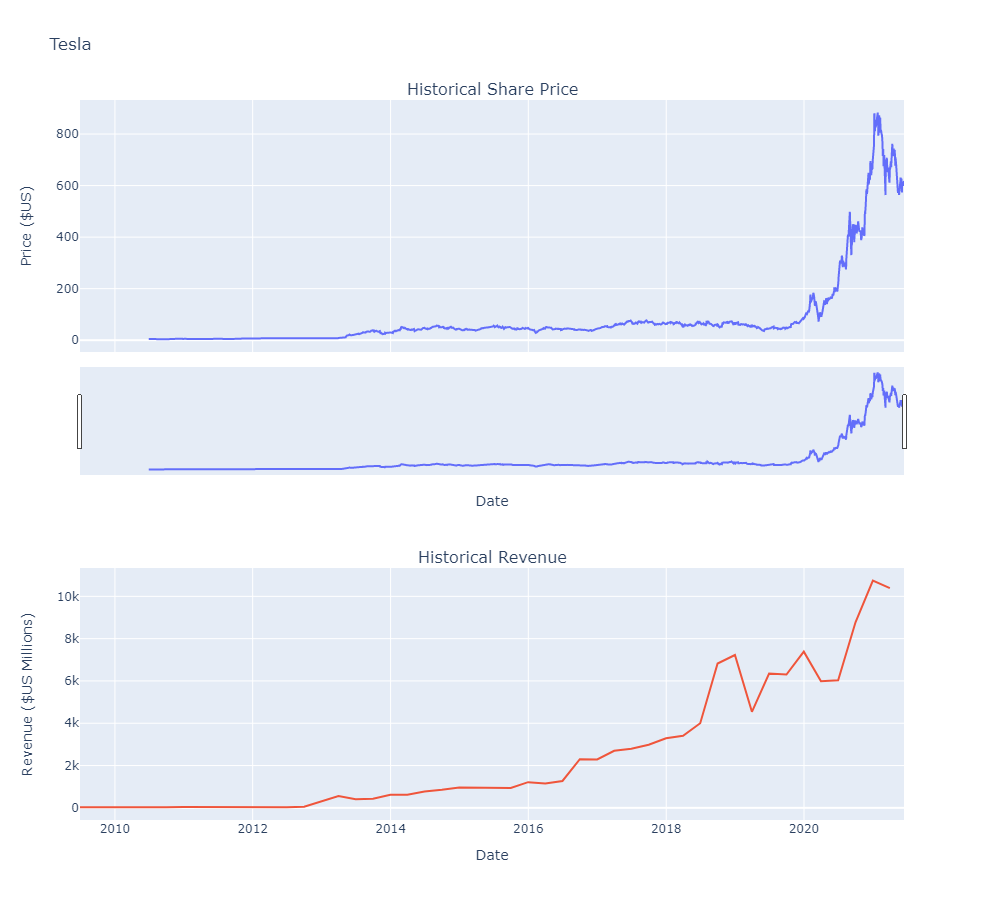

## Plotting GameStop Stock Graph


In [27]:
make_graph(gme_data, gme_revenue_df, 'GameStop')

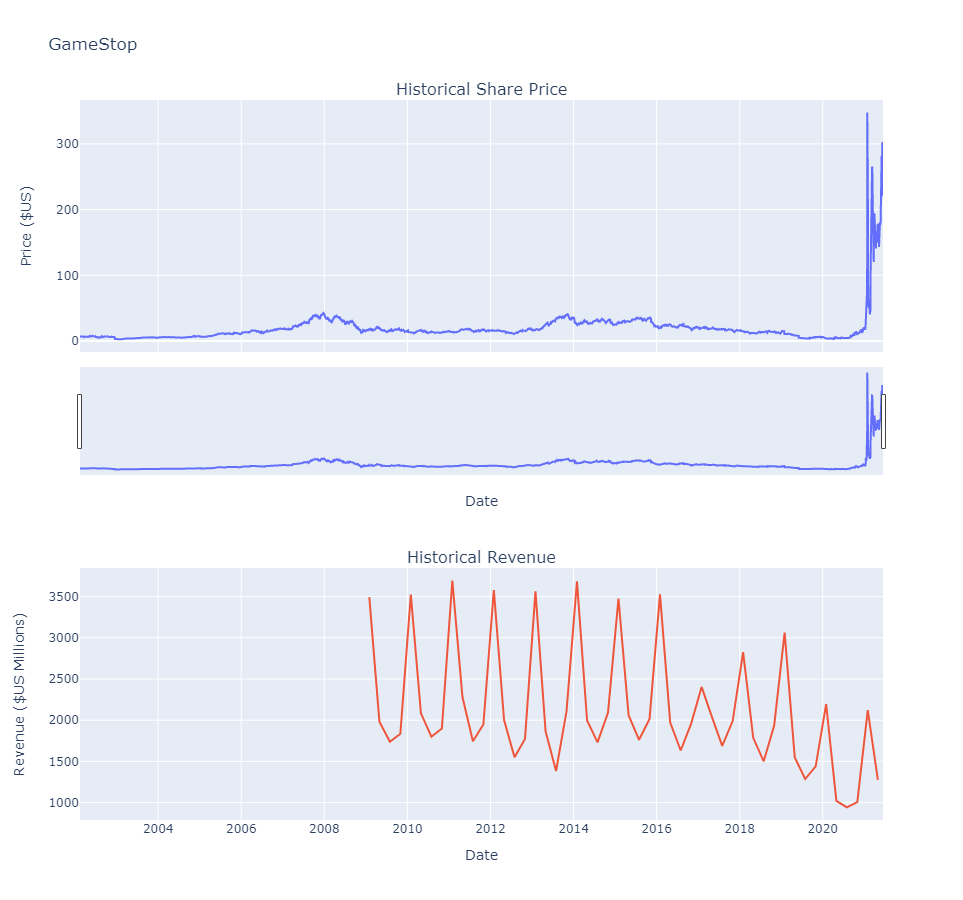
